In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'axes.labelsize': 'large',
    'figure.dpi': 100,
})

In [2]:
ΔT, U_cal = np.array([
    [86.6, 3.542],
    [86.3, 3.533],
    [85.8, 3.508],
    [79.9, 3.248],
    [75.9, 3.064],
    [66.6, 2.773],
    [63.1, 2.563],
    [59.2, 2.410],
    [56.5, 2.281],
    [52.8, 2.129],
    [46.8, 1.880],
    [42.4, 1.705],
    [88.2, 3.583],
]).T

In [3]:
print(str.join('',
    [f'{ΔT:.1f} & {U_cal:.3f} \\\\\n'
     for ΔT, U_cal in sorted(zip(ΔT, U_cal))]
))

42.4 & 1.705 \\
46.8 & 1.880 \\
52.8 & 2.129 \\
56.5 & 2.281 \\
59.2 & 2.410 \\
63.1 & 2.563 \\
66.6 & 2.773 \\
75.9 & 3.064 \\
79.9 & 3.248 \\
85.8 & 3.508 \\
86.3 & 3.533 \\
86.6 & 3.542 \\
88.2 & 3.583 \\



In [4]:
def σ_at_ΔT(ΔT):
    if ΔT < 50:
        return 0.1
    elif ΔT < 70:
        return 1
    else:
        return 2
σ_ΔT = 2 * np.array(list(map(σ_at_ΔT, ΔT)))

def linear(x, k, c):
    return k*x + c
    
par, cov = curve_fit(
    linear, U_cal, ΔT, sigma=σ_ΔT, absolute_sigma=True)
k, c = par
σ_k, σ_c = np.sqrt(np.diag(cov))
k, σ_k, c, σ_c

(24.120560109955893, 0.722638625655563, 1.3557359187237878, 1.322356368889518)

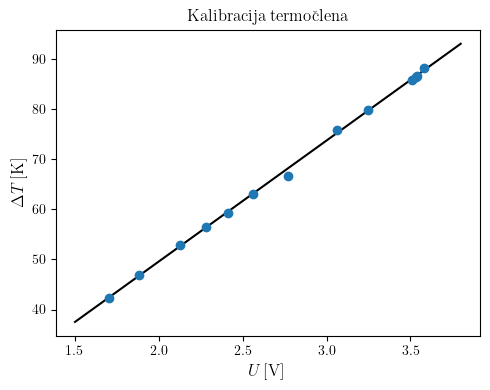

In [5]:
fig, ax = plt.subplots(1, 1, figsize=[5, 4])

ax.scatter(U_cal, ΔT, zorder=3)
U_lin = np.linspace(1.5, 3.8)
ax.plot(U_lin, k*U_lin + c, color='black')

ax.set_title(r'Kalibracija termočlena')
ax.set_xlabel(r'$U\,[\mathrm{V}]$')
ax.set_ylabel(r"$\Delta T\,[\mathrm{K}]$")
fig.tight_layout()
fig.savefig('calibration.pdf')

In [6]:
P, U = np.array([
    [30.2, 0.178],
    [49.5, 0.324],
    [70.9, 0.427],
    [83.2, 0.464],
    [90.1, 0.585],
    [101.4, 0.654],
    [59.9, 0.324],
]).T

In [7]:
print(str.join('',
    [f'{P:.1f} & {U:.3f} \\\\\n'
     for P, U in sorted(zip(P, U))]
))

30.2 & 0.178 \\
49.5 & 0.324 \\
59.9 & 0.324 \\
70.9 & 0.427 \\
83.2 & 0.464 \\
90.1 & 0.585 \\
101.4 & 0.654 \\



In [8]:
ℓ, Δℓ = 5.6e-2, 0.1e-2
R, ΔR = 4.46e-2/2, 0.10e-2/2
S = np.pi * R**2

ΔT = k*U + c
σ_P = 0.5
par, cov = curve_fit(
    linear, ΔT*S/ℓ, P, sigma=[2*σ_P]*len(P), absolute_sigma=True)
λ, n = par
σ_λ, σ_n = np.sqrt(np.diag(cov))
λ, σ_λ

(220.0723094349809, 3.7044923371146172)

In [9]:
# Compare x and y error of data we're fitting to see if using 2σ_P as y error is justified.
σ_U = 0.001
σ_ΔT = np.sqrt(
    (k * σ_U)**2 +
    (U * σ_k)**2
)
np.mean(σ_ΔT / ΔT), np.mean(σ_P / P)

(0.026120927986281073, 0.008363814928522815)

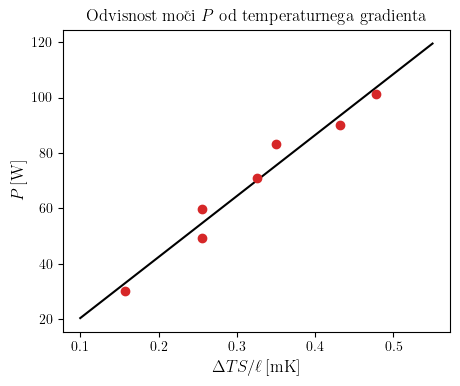

In [11]:
fig, ax = plt.subplots(1, 1, figsize=[5, 4])

ax.scatter(ΔT*S/ℓ, P, color='tab:red', zorder=3)
x_lin = np.linspace(0.1, 0.55)
ax.plot(x_lin, λ*x_lin + n, color='black')

ax.set_title(r'Odvisnost moči $P$ od temperaturnega gradienta')
ax.set_xlabel(r'$\Delta T S / \ell \,[\mathrm{mK}]$')
ax.set_ylabel(r"$P\,[\mathrm{W}]$")
fig.savefig('lambda-fit.pdf')